In [7]:
!pip install numpy pandas scikit-learn nltk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import re
from imblearn.over_sampling import SMOTE
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
from wordcloud import WordCloud

[Image Title](ML/FP/Screenshot%202024-03-11%20at%208.22.45%E2%80%AFPM.png)


# Introduction

In the past years, self-driving technology has emerged as a frontier of innovation, promising to revolutionize the way we perceive mobility and safety. On the other hand, the adoption and acceptance of this technology are influenced by public sentiment, which in turn shapes the regulatory and business landscapes. This mini machine learning project aims to analyze Twitter (now X) sentiment related to self-driving cars, leveraging a dataset that dates back in 2015, provides a snapshot of historical public opinion. By understanding past sentiments, we can better anticipate future trends, challenges, and opportunities associated with autonomous vehicles.


This project sits at the intersection of technology, society, and policy, offering valuable insights accross industries.

<b>Technological Evolution </b>: We can analyze how public perceptions of self-driving cars have changed over time. This includes the impact of technological advancements, accidents, new regulations, etc.

<b>Social Acceptance </b>: By analyzing the data, we may gauge societal readiness to embrace autonomous vehicles. This includes understanding concerns, misconceptions, and expectations that may influence adoption rates.

<b>Policy and Regulatory Impact </b>: Understanding public sentiment trends can inform policymakers and stakeholders. This can guide the development of regulations that balance innovation with public safety and trust.

<b>Strategic Business Insights </b>: Companies in the automotive and technology industries can gain valuable insights from sentiment analysis. This can inform market positioning, consumer trust strategies, and communication approaches.



# Problem Statement




# Dataset Discussion

This data was extracted from data.world website (see appendix). It is a simple twitter sentiment analysis created 8 years ago where contributors read tweets and classified them as very positive, slightly positive, neutral, slightly negative, or very negative.

It consists of 11 columns with more than 7100 rows and the tweets are not exceeding 240 characters (Twitter limitation).

In [11]:
file_path = 'Twitter-sentiment-self-drive-DFE.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')


# Dataset Preview

In [14]:

df.head().style.set_table_styles(
    [{'selector': 'th',
      'props': [('background-color', 'lightgreen'),
                ('color', 'black'),
                ('font-family', 'verdana')]},
     {'selector': 'td',
      'props': [('font-family', 'verdana')]}]
)


,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,sentiment,sentiment:confidence,our_id,sentiment_gold,sentiment_gold_reason,text
0,724227031,True,golden,236,nan,5,0.757900,10001,5 4,Author is excited about the development of the technology.,Two places I'd invest all my money if I could: 3D printing and Self-driving cars!!!
1,724227032,True,golden,231,nan,5,0.877500,10002,5 4,Author is excited that driverless cars will benefit the disabled.,Awesome! Google driverless cars will help the blind travel more often; https://t.co/QWuXR0FrBpv
2,724227033,True,golden,233,nan,2,0.680500,10003,2 1,The author is skeptical of the safety and reliability of a driverless car.,"If Google maps can't keep up with road construction, how am I supposed to trust a driverless car to get around here?"
3,724227034,True,golden,240,nan,2,0.882000,10004,2 1,The author is skeptical of the project's value.,Autonomous cars seem way overhyped given the technology challenges; pilotless planes seem much more doable and needed.
4,724227035,True,golden,240,nan,3,1.000000,10005,3,Author is making an observation without expressing an opinion.,Just saw Google self-driving car on I-34. It was painted green and blue.


# Scope and Limitations

This mini project will only focus on the available dataset mentioned above. While it is noted that the dataset may be considerd outdated, it is still a good idea to see what the public sentiments are regarding the autonomous cars in the US.

Further, it is also noted that these tweets are made mid 2015 which is the same year with Tesla Model X was release. By exploring this dataset, we are able to learn what the sentiments are of the public especially those in US.


# Preprocess

Due to uniqe and often noisy nature of social media texts, it is important to clean the data accross several key points.

We will be removing URLs, mentions, punctuations, and convert to lower case to lessen the noise and normalize the datasets.

In addition Term Frequency-Inverse Document Frequency (TF-IDF) will also be used to evaluate the important words in the dataset

Finally, we will also encode labels to feed these data into machine learning algorithms.

In [19]:
def clean_text(text):
    text = re.sub(r'http\S+|www.\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuation
    text = text.lower().strip()  # Convert to lowercase
    return text

# Apply cleaning function to the text column
df['cleaned_text'] = df['text'].apply(clean_text)

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer(
    max_features=1000,  # Limit the number of features
    ngram_range=(1, 2),  # Unigrams and bigrams
    min_df=5,  # Minimum document frequency
    max_df=0.7)  # Maximum document frequency

# Fit and transform the processed tweets
X_tfidf = vectorizer.fit_transform(df['cleaned_text'])

# Encode the sentiment labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['sentiment'])

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42)

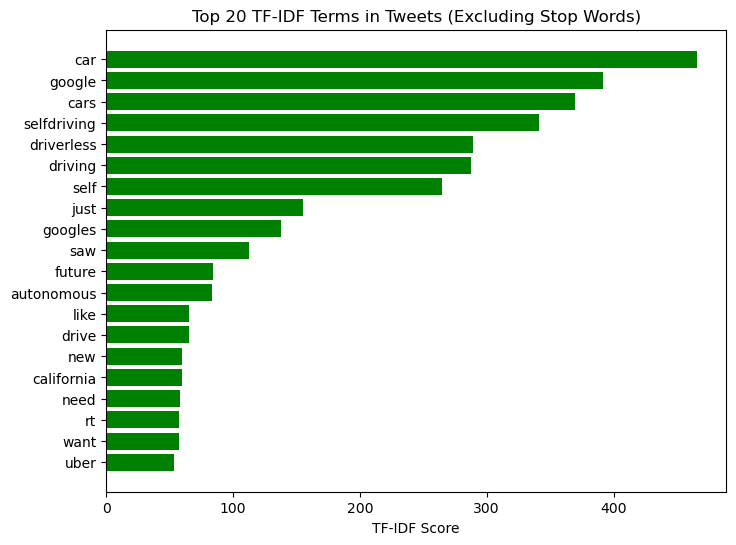

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Initialize the TF-IDF Vectorizer with English stop words
vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the processed text
X_tfidf = vectorizer.fit_transform(df['cleaned_text'])

# Sum tfidf frequency of each term through documents and sort by frequency
sums = X_tfidf.sum(axis=0)
terms = vectorizer.get_feature_names_out()
data = []
for col, term in enumerate(terms):
    data.append((term, sums[0, col]))
ranking = pd.DataFrame(data, columns=['term', 'rank']).sort_values('rank', ascending=False)

# Now let's plot the top terms excluding stop words
top_n = 20
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(range(top_n), ranking['rank'][:top_n], color='green', align='center')
ax.set_yticks(range(top_n))
ax.set_yticklabels(ranking['term'][:top_n])
ax.invert_yaxis()  # Labels read top-to-bottom
ax.set_xlabel('TF-IDF Score')
ax.set_title('Top 20 TF-IDF Terms in Tweets (Excluding Stop Words)')

plt.show()

In [47]:
# Adjust the list of columns to drop accordingly
X = df.drop(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
             '_last_judgment_at', 'sentiment', 'sentiment:confidence', 'our_id',
             'sentiment_gold', 'sentiment_gold_reason', 'text', 'cleaned_text',
             'text_length', 'sentiment_encoded'], axis=1, errors='ignore')  # errors='ignore' is useful to avoid errors if some columns don't exist



# Exploratory Data Analysis

It is important to explore the data for deeper analysis and modelling.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


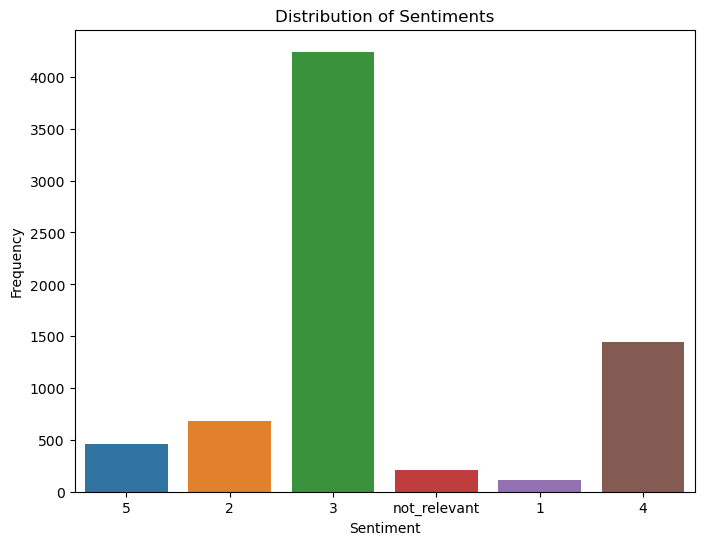

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of sentiments
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()


In [29]:
#Class Distribution

# Analyze class distribution
class_distribution = df['sentiment'].value_counts(normalize=True)
print(class_distribution)


sentiment
3               0.593208
4               0.201789
2               0.095724
5               0.064142
not_relevant    0.029765
1               0.015372
Name: proportion, dtype: float64


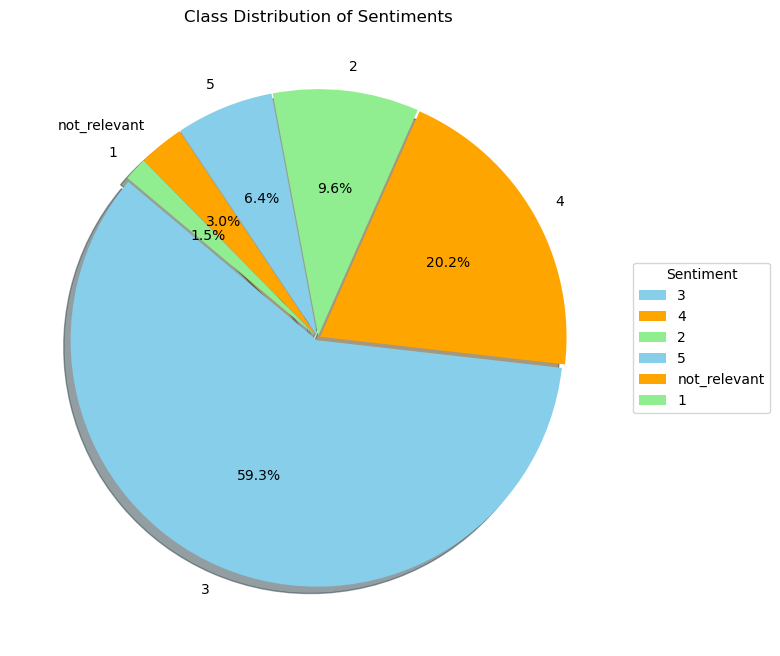

In [36]:
import matplotlib.pyplot as plt

# Assuming 'class_distribution' is your Series with sentiment distribution
# Calculate the number of categories
num_categories = class_distribution.size

# Generate a small "explode" value for each category to separate slices a bit
explode = [0.01] * num_categories  # Slightly separate each slice

# Pie chart with exploded slices
plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
class_distribution.plot.pie(autopct='%1.1f%%', startangle=140, explode=explode, shadow=True, colors=['skyblue', 'orange', 'lightgreen'])

plt.title('Class Distribution of Sentiments')
plt.ylabel('')  # Hide the y-label as it's not needed for a pie chart

# Move the legend outside of the pie chart
plt.legend(title='Sentiment', loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


From the above results of class distribution, it clearly shows that the datasets are highly imbalanced. The neutral sentiment (labeled as 3) dominates the dataset, while the very negative sentiment (labeled as 1) is the least represented.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


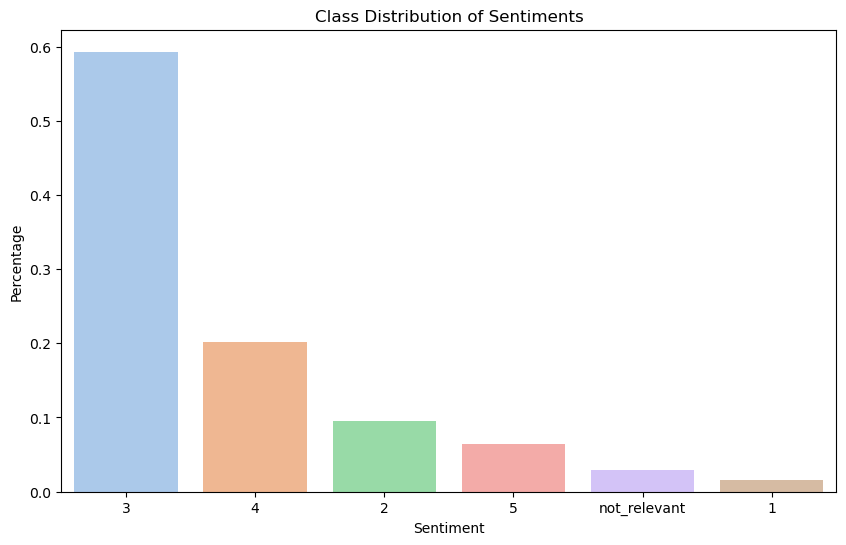

In [31]:
import seaborn as sns

# Convert class_distribution to DataFrame for seaborn
class_distribution_df = class_distribution.reset_index()
class_distribution_df.columns = ['Sentiment', 'Percentage']

# Bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Sentiment', y='Percentage', data=class_distribution_df, palette='pastel')
plt.title('Class Distribution of Sentiments')
plt.ylabel('Percentage')
plt.xlabel('Sentiment')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


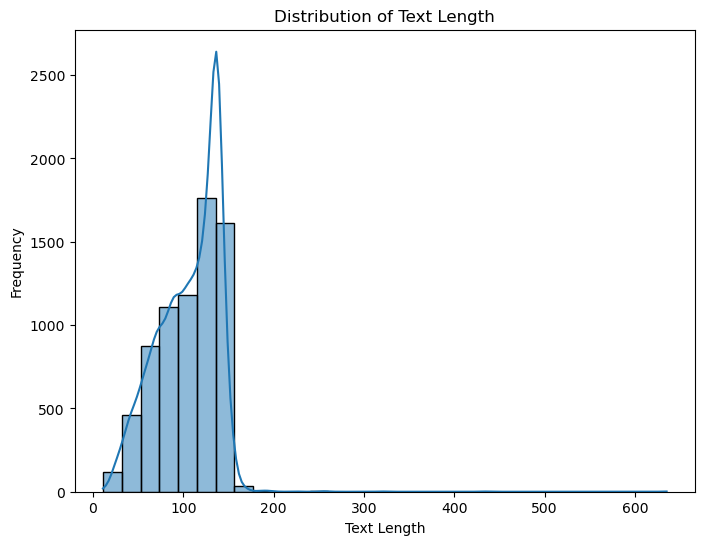

In [96]:
# Calculate text length
df['text_length'] = df['text'].apply(len)

# Plot the distribution of text lengths
plt.figure(figsize=(8, 6))
sns.histplot(df['text_length'], bins=30, kde=True)
plt.title('Distribution of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()


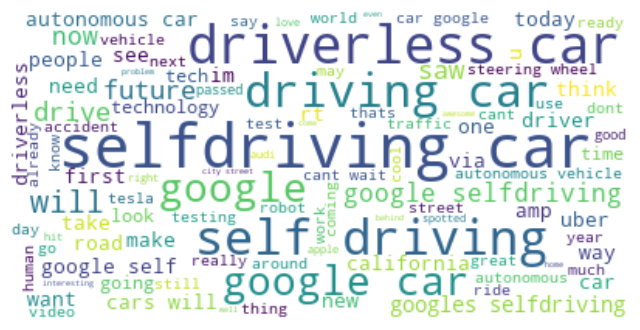

In [97]:
# Generate a word cloud for the most common words in the dataset
wordcloud = WordCloud(background_color='white', max_words=100, contour_width=3, contour_color='steelblue')

# Concatenate all the text
text = " ".join(review for review in df.cleaned_text)

# Generate and display the word cloud
wordcloud.generate(text)
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


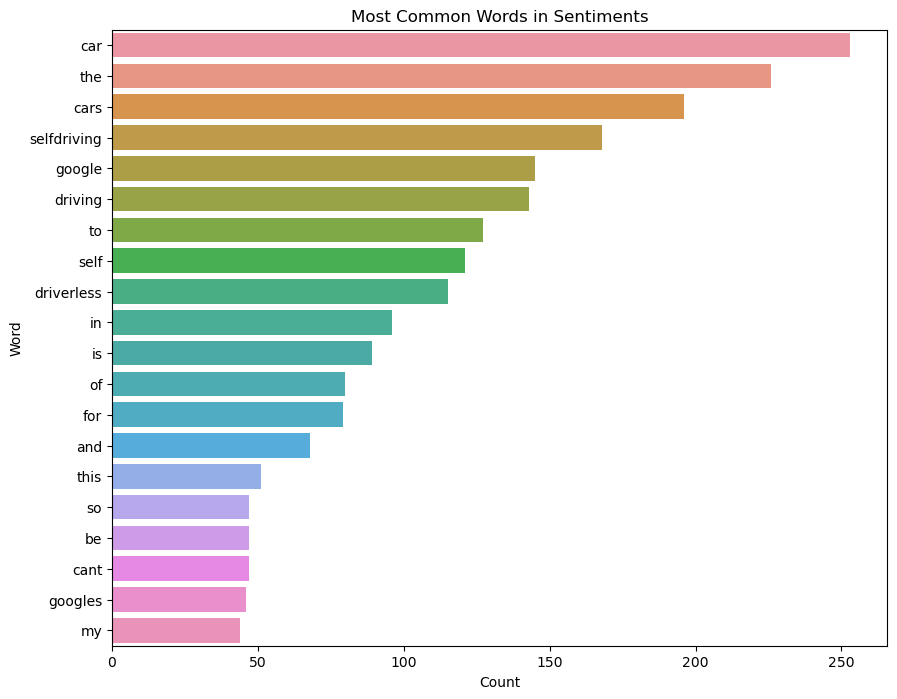

In [98]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Updated function to plot most frequent words
def plot_most_frequent_words(texts, title, n=20):
    vec = CountVectorizer().fit(texts)
    bag_of_words = vec.transform(texts)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    common_words = words_freq[:n]
    df_common_words = pd.DataFrame(common_words, columns = ['Word', 'Count'])
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Count', y='Word', data=df_common_words)
    plt.title(title)
    plt.show()
    
very_positive_texts = df[df['sentiment'] == '5']['cleaned_text']
plot_most_frequent_words(very_positive_texts, 'Most Common Words in Sentiments')

In [ ]:
#>???


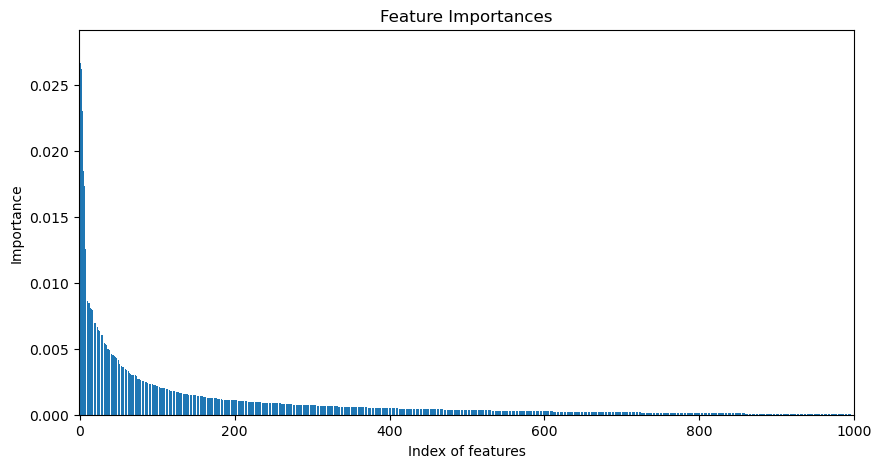

In [99]:
from sklearn.ensemble import RandomForestClassifier

# Assuming you have a feature matrix X and target variable y
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Plot feature importance
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 5))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xlabel("Index of features")
plt.ylabel("Importance")
plt.xlim([-1, X_train.shape[1]])
plt.show()

# Addressing Imbalance

In this dataset and for our use case, it is noted that the datasets are imbalanced with "Neutral" dominating the results which we can already see just by exploring the data.

Given this, we can use Synthetic Minority Over-sampling Technique) or SMOTE to create synthetic samples of the minority class. This will enhance the dataset's balance.

In addition, a combined approach of resampling the dataset can be more effective which involves both over-sampling the mionority class and undersampling the majority class to create a more balanced dataset.

In [37]:
print(df.columns)

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'sentiment', 'sentiment:confidence', 'our_id',
       'sentiment_gold', 'sentiment_gold_reason', 'text', 'cleaned_text',
       'sentiment_encoded'],
      dtype='object')


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


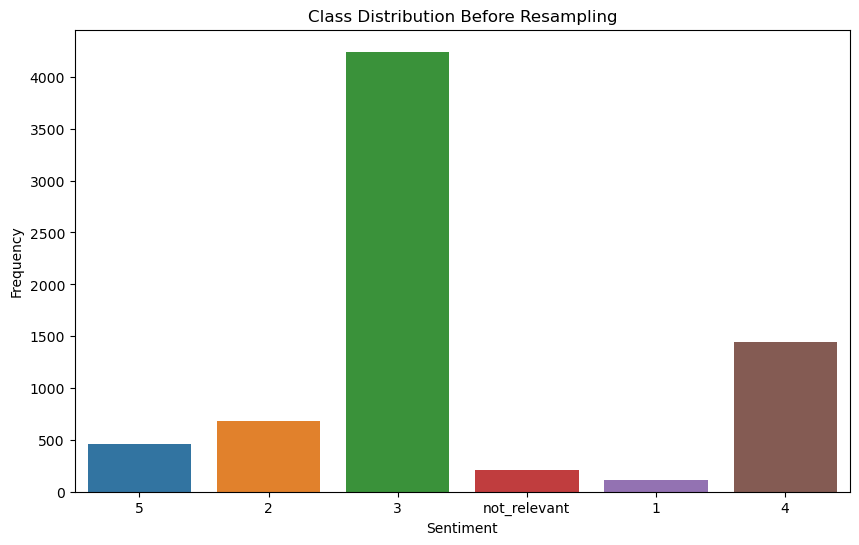

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the class distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', data=df)
plt.title('Class Distribution Before Resampling')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

In [39]:
# Separate the dataset into different class-specific DataFrames
df_neutral = df[df.sentiment == '3']
df_slightly_positive = df[df.sentiment == '4']
df_slightly_negative = df[df.sentiment == '2']
df_very_positive = df[df.sentiment == '5']
df_not_relevant = df[df.sentiment == 'not_relevant']
df_very_negative = df[df.sentiment == '1']


In [138]:
from sklearn.utils import resample

# Undersample the neutral class by half (you can adjust the fraction)
df_neutral_undersampled = resample(df_neutral, replace=False, n_samples=int(len(df_neutral)*0.5), random_state=123)

# Oversample the very negative and not relevant classes (adjust numbers as needed)
df_very_negative_oversampled = resample(df_very_negative, replace=True, n_samples=len(df_slightly_positive), random_state=123)
df_not_relevant_oversampled = resample(df_not_relevant, replace=True, n_samples=len(df_slightly_positive), random_state=123)

# Combine back to a single DataFrame
df_resampled = pd.concat([df_neutral_undersampled, df_slightly_positive, df_slightly_negative, df_very_positive, df_not_relevant_oversampled, df_very_negative_oversampled])


In [139]:
X_resampled_tfidf = tfidf_vectorizer.transform(df_resampled['cleaned_text']).toarray()
y_resampled = df_resampled['sentiment'].values


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


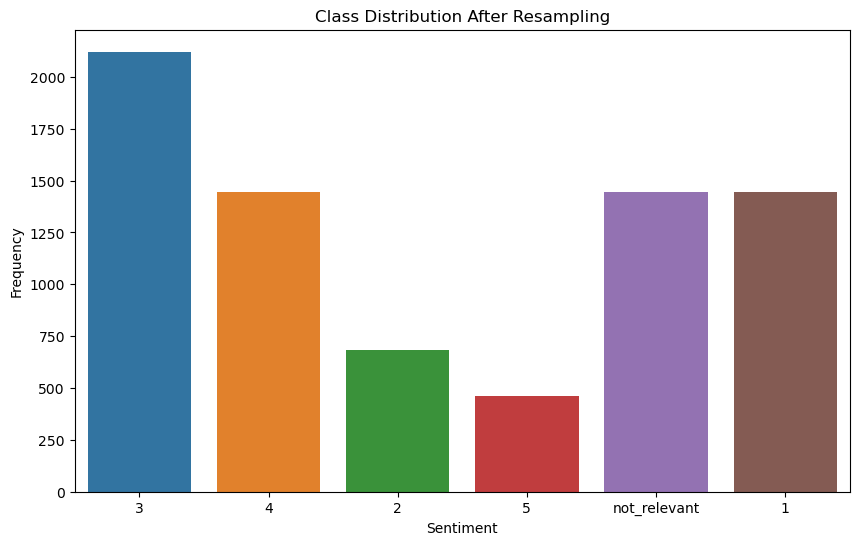

In [140]:
# Visualize the class distribution after resampling
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', data=df_resampled)
plt.title('Class Distribution After Resampling')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()


# Model Training

### Logistic Regression

The Machine Learning method Logistic regression is relevant in this use case.
We will set the max_iter to a higher number to ensure convergence since the default may not always be sufficient for logistic regression to converge.


Accuracy: 0.630586592178771
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.33      0.10      0.15       135
           2       0.67      0.94      0.78       849
           3       0.46      0.28      0.34       301
           4       0.54      0.08      0.14        86
           5       0.60      0.07      0.13        41

    accuracy                           0.63      1432
   macro avg       0.43      0.24      0.26      1432
weighted avg       0.57      0.63      0.56      1432



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


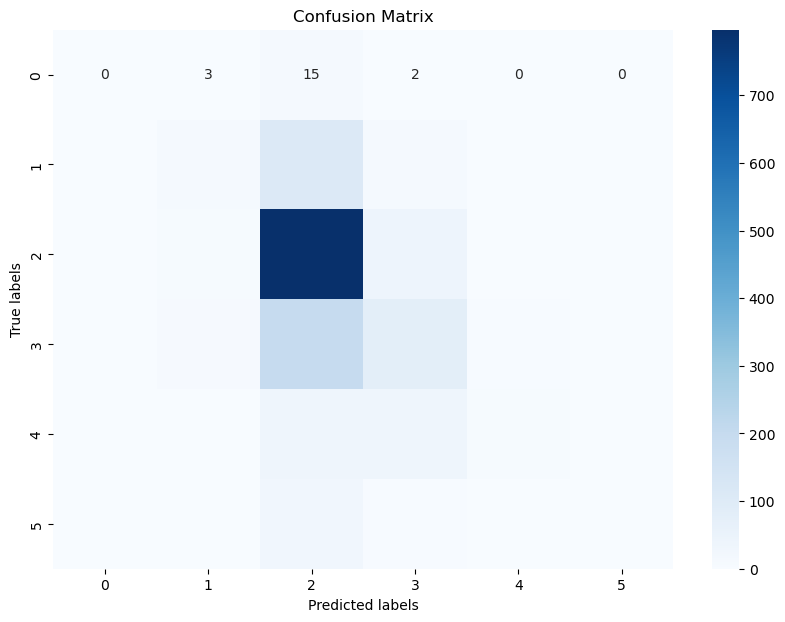

Model training and evaluation runtime: 0.3422966003417969 seconds


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(solver='lbfgs', max_iter=1000)

# Fit the model
start_time = time.time()
logreg.fit(X_train, y_train)
end_time = time.time()

# Predict on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = logreg.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Keep track of the runtime
runtime = end_time - start_time
print(f"Model training and evaluation runtime: {runtime} seconds")

# To add results to the comparison table later
logreg_results = {
    'Machine Learning Method': 'Logistic Regression',
    'Test Accuracy': accuracy,
    'Best Parameter': 'C=1', 
    'Top Predictor Variable': 'N/A',  
    'Run Time': runtime
}


In [ ]:
#MOdel Training Linear SVM

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined a

Accuracy: 0.5928770949720671

              precision  recall  f1-score  support
car                0.00    0.00      0.00    20.00
cars               0.00    0.00      0.00   135.00
google             0.59    1.00      0.74   849.00
selfdriving        0.00    0.00      0.00   301.00
the                0.00    0.00      0.00    86.00
to                 0.00    0.00      0.00    41.00
accuracy           0.59    0.59      0.59     0.59
macro avg          0.10    0.17      0.12  1432.00
weighted avg       0.35    0.59      0.44  1432.00


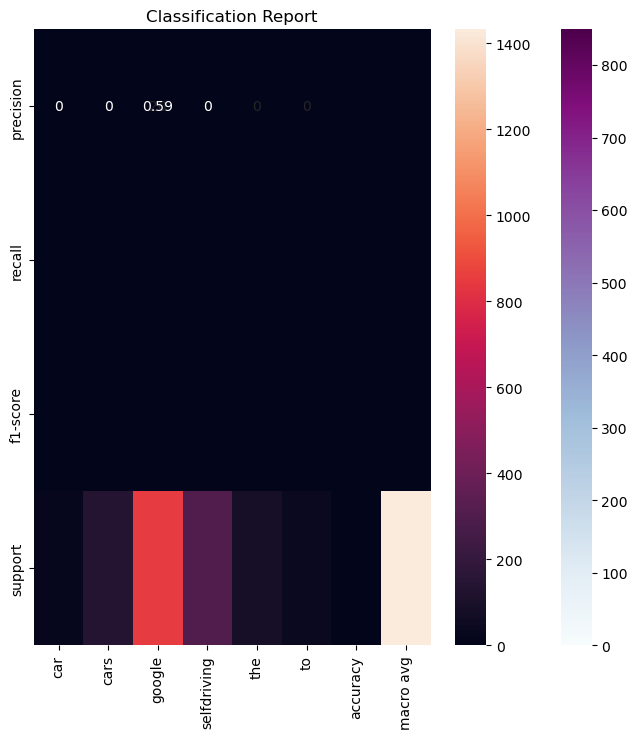

In [55]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df['cleaned_text'] is your features and df['sentiment'] is the target variable.

# Step 1: Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=6)
X = tfidf_vectorizer.fit_transform(df['cleaned_text'])
y = df['sentiment']

# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Model Training
linear_svm = LinearSVC(random_state=42)
linear_svm.fit(X_train, y_train)

# Step 4: Model Evaluation
y_pred = linear_svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Step 5: Visualization
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='BuPu')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Linear SVM')

# Classification Report
report = classification_report(y_test, y_pred, target_names=tfidf_vectorizer.get_feature_names_out(), output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report = df_report.round(2)

# Plotting the classification report
sns.heatmap(df_report.iloc[:-1, :].T, annot=True)
plt.title('Classification Report')

# Display the accuracy
print(f'Accuracy: {accuracy}\n')
print(df_report)

# Show plots
plt.show()


# Random Forest

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498

Accuracy: 0.6333798882681564

              precision  recall  f1-score  support
1                  0.00    0.00      0.00    20.00
2                  0.44    0.05      0.09   135.00
3                  0.66    0.95      0.78   849.00
4                  0.48    0.26      0.33   301.00
5                  0.46    0.14      0.21    86.00
not_relevant       1.00    0.02      0.05    41.00
accuracy           0.63    0.63      0.63     0.63
macro avg          0.51    0.24      0.24  1432.00
weighted avg       0.59    0.63      0.56  1432.00


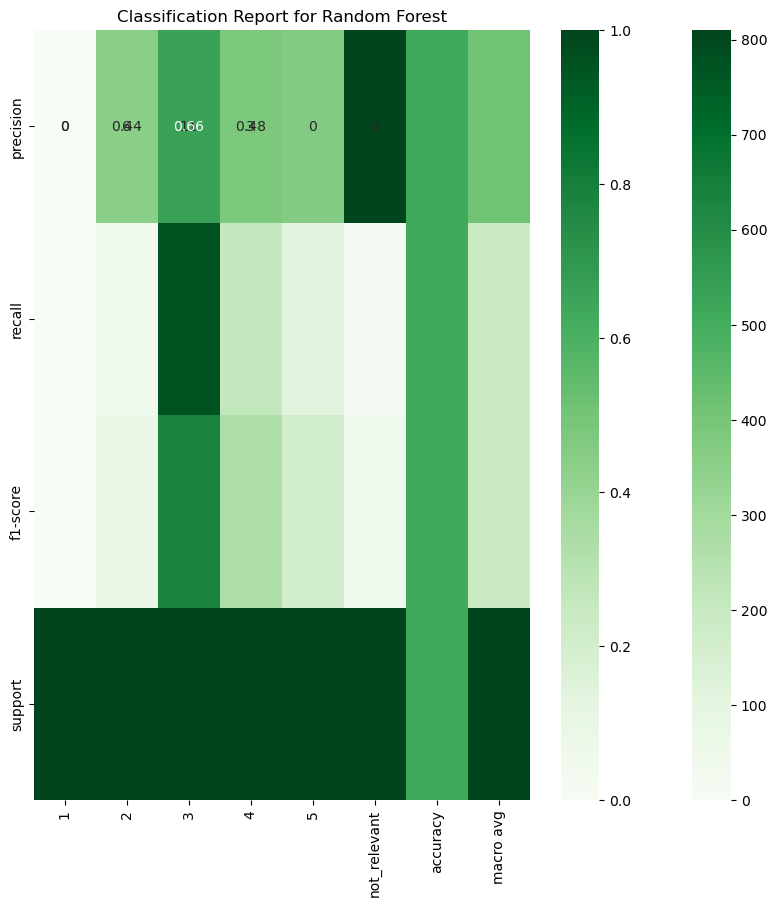

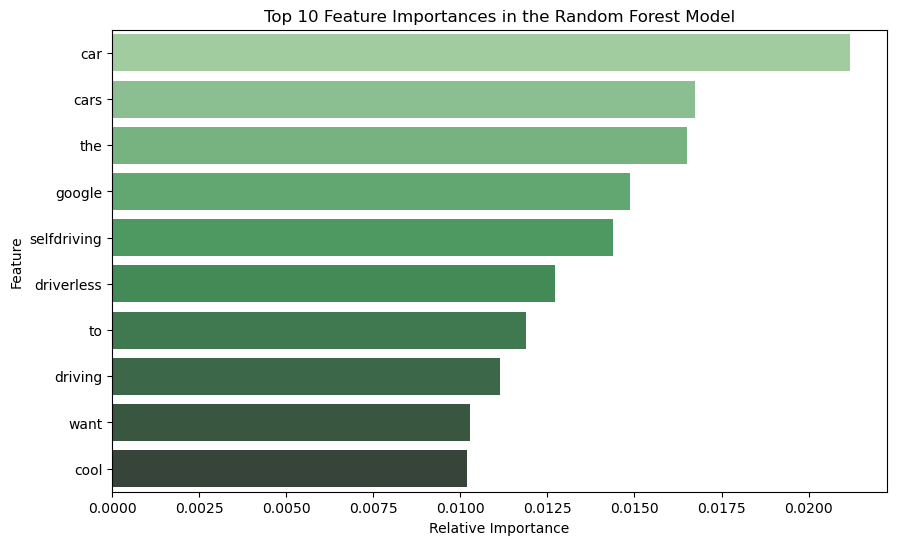

In [146]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming df['cleaned_text'] is your features and df['sentiment'] is the target variable.

# Step 1: Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X = tfidf_vectorizer.fit_transform(df['cleaned_text'])
y = df['sentiment']

# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Model Training
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Step 4: Model Evaluation
y_pred = random_forest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Step 5: Visualization
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Greens')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Random Forest')

# Classification Report
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report = df_report.round(2)

# Plotting the classification report
sns.heatmap(df_report.iloc[:-1, :].T, annot=True, vmin=0, vmax=1, cmap='Greens')
plt.title('Classification Report for Random Forest')

# Display the accuracy
print(f'Accuracy: {accuracy}\n')
print(df_report)

# Feature Importance
feature_importances = random_forest.feature_importances_
feature_names = tfidf_vectorizer.get_feature_names_out()
top_features = sorted(zip(feature_importances, feature_names), reverse=True)[:10]

# Visualize Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=[x[0] for x in top_features], y=[x[1] for x in top_features], palette='Greens_d')
plt.title('Top 10 Feature Importances in the Random Forest Model')
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.show()


Accuracy: 0.619413407821229

              precision  recall  f1-score  support
1                  0.06    0.05      0.05    20.00
2                  0.35    0.06      0.10   135.00
3                  0.65    0.95      0.77   849.00
4                  0.49    0.19      0.27   301.00
5                  0.44    0.16      0.24    86.00
not_relevant       0.12    0.02      0.04    41.00
accuracy           0.62    0.62      0.62     0.62
macro avg          0.35    0.24      0.25  1432.00
weighted avg       0.55    0.62      0.54  1432.00


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector)

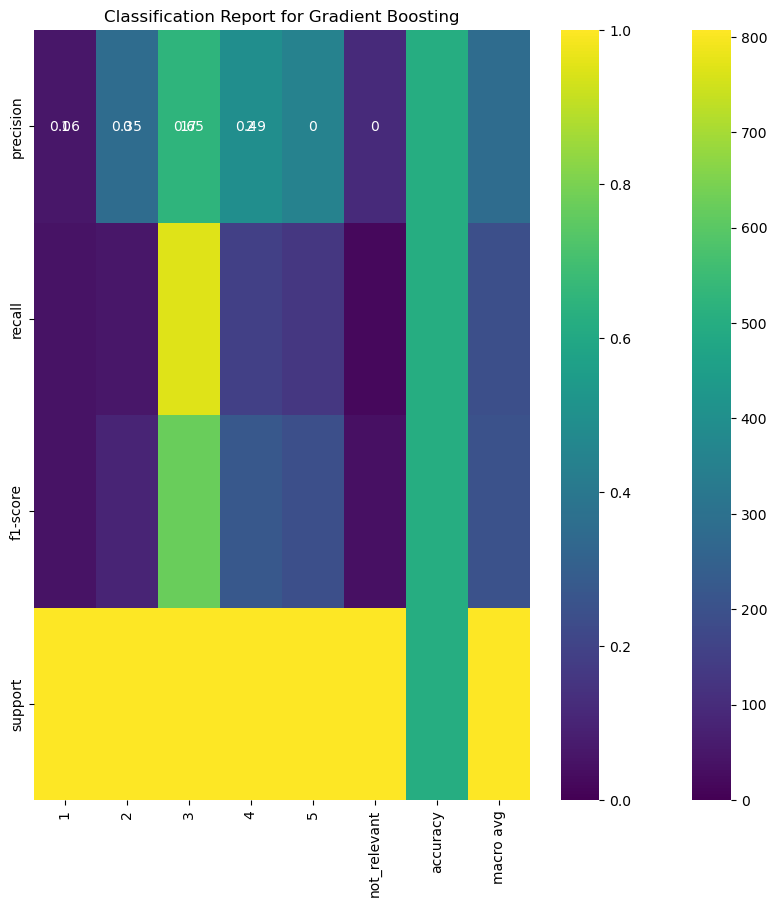

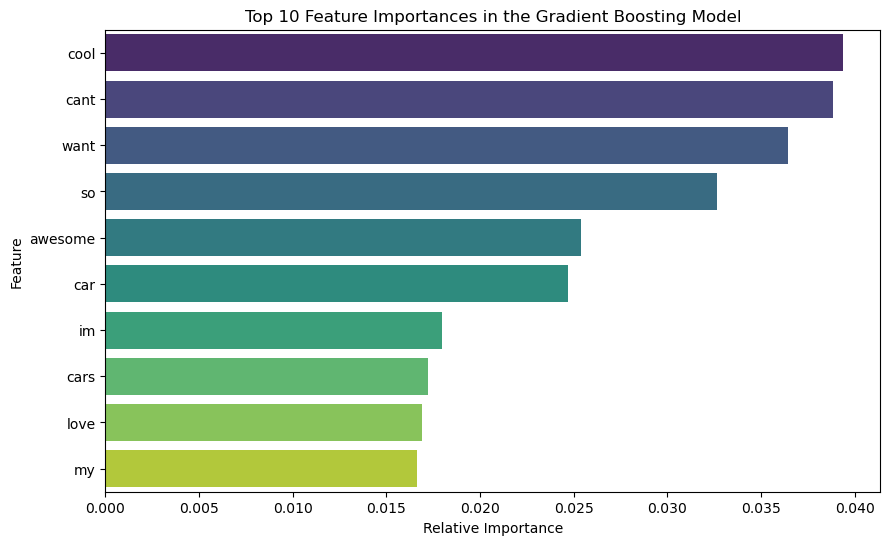

In [56]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df['cleaned_text'] contains the text data and df['sentiment'] is the target

# Step 1: Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X = tfidf_vectorizer.fit_transform(df['cleaned_text'])
y = df['sentiment']

# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Model Training
gbc = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbc.fit(X_train, y_train)

# Step 4: Model Evaluation
y_pred = gbc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Step 5: Visualization
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='viridis')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Gradient Boosting')

# Classification Report
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report = df_report.round(2)

# Plotting the classification report
sns.heatmap(df_report.iloc[:-1, :].T, annot=True, vmin=0, vmax=1, cmap='viridis')
plt.title('Classification Report for Gradient Boosting')

# Display the accuracy
print(f'Accuracy: {accuracy}\n')
print(df_report)

# Feature Importance
feature_importances = gbc.feature_importances_
feature_names = tfidf_vectorizer.get_feature_names_out()
top_features = sorted(zip(feature_importances, feature_names), reverse=True)[:10]

# Visualize Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=[x[0] for x in top_features], y=[x[1] for x in top_features], palette='viridis')
plt.title('Top 10 Feature Importances in the Gradient Boosting Model')
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.show()


# Conclusion

1. As a conclusion, it was clear that majority of the sentiment of datasets are considered Neutral.
2. Applying the machine learning models above, it is imporant that the ML that we use matched our current dataset and use case. In this project we chose GBM, Linear SVM and Random Forest as it is considered relevant.

# Appendix:
    
1. Self Driving Cars Data link:
https://data.world/crowdflower/sentiment-self-driving-cars